In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import pyphotdb.database as database

print matplotlib.__version__
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (10, 8.0)

1.5.1


In [2]:
db = database.database('localhost', 4001, 'stardb', 'stardb', 'stardb_test')

In [3]:
exposures = db.getExposureIDs('odi_u')
print exposures
objects = db.findObjects(48.66, 41.3, 3600)
     

    

['20151204T005306.2', '20151204T005306.3', '20151204T005306.4', '20151204T005306.5']


In [32]:
# Query database for all objects    
for object in objects:
     db.getVisitsForObject(object, minVisits=4)
  

In [33]:
ra = []
dec = []
stddev = []
mean = []
magdelta = []

refkey = exposures[0]
for object in objects:
   
    #if refkey in object.visits:
        
        
        refbuf = [] 
        for vid in object.visits:
             
            v = object.visits[vid]
            refbuf.append (v.data['mag'])
        refmag = np.average (refbuf)
        
        for vid in object.visits:
            v = object.visits[vid]
            mydelta = v.data['mag'] - refmag
            if (math.fabs (mydelta) < 0.5):
                x,y = v.getGlobalXY()
                magdelta.append (mydelta)
                ra.append(x)
                dec.append(y)
                  
magdelta = np.asarray (magdelta)
    
print "Found %d entries " % (len(magdelta))

Found 1872 entries 


-0.0015625
0.0692020736629


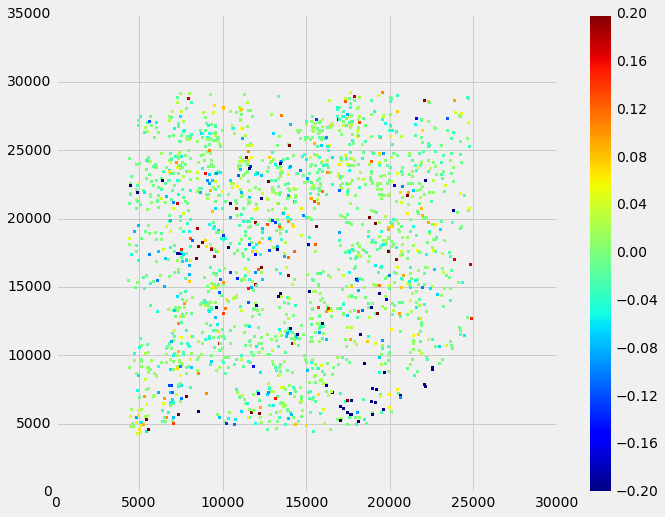

In [34]:
print np.median(magdelta)
print np.std(magdelta)
    
plt.scatter (ra,dec, c= magdelta, marker="s",linewidths=0, s=9, vmin=-0.2,vmax=0.2)  
plt.colorbar()
plt.show()

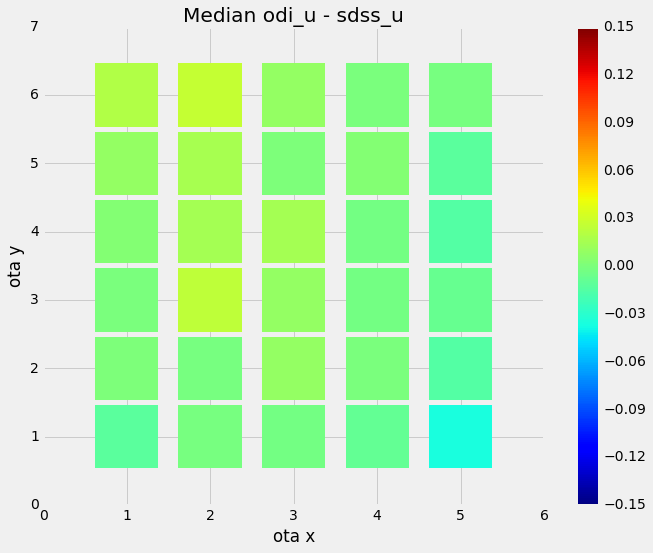

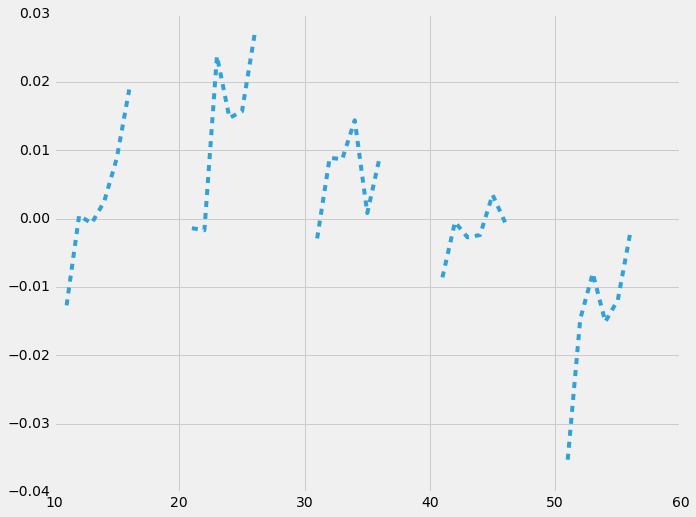

In [30]:
delta = {}
for xx in range (0,7):
    for yy in range (0,7):
        delta["%d%d"%(xx,yy)] = []
        
for object in objects:
   
    if refkey in object.visits:
        refmag = object.visits[refkey].data['mag']         
       
        for vid in object.visits:
            if vid != refkey:
                v = object.visits[vid]
                ota = v.data['ota']
                otax, otay = divmod (ota,10)
                delta["%d%d" % (otax,otay)].append (v.data['mag'] - refmag)


x = []
y = []
xy = []
d = []
for xx in range (0,7):
    for yy in range (0,7):
        x.append (xx)
        y.append (yy)
        xy.append (xx * 10 + yy)
        d.append ( np.median (delta["%d%d" % (xx,yy)]) )
d = np.asarray(d) 
x = np.asarray(x)
y = np.asarray(y)

plt.scatter (x,y,c=d,marker="s",linewidths=0, s=4000 , vmin=-0.15,vmax=0.15)
plt.colorbar()
plt.xlabel ("ota x")
plt.ylabel ('ota y')
plt.title ("Median odi_u - sdss_u")
plt.show()

plt.plot (xy,d,"--")
plt.show()

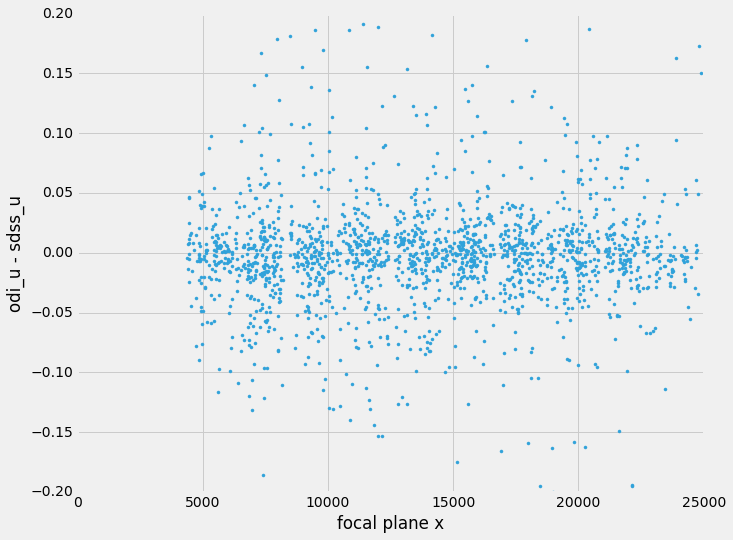

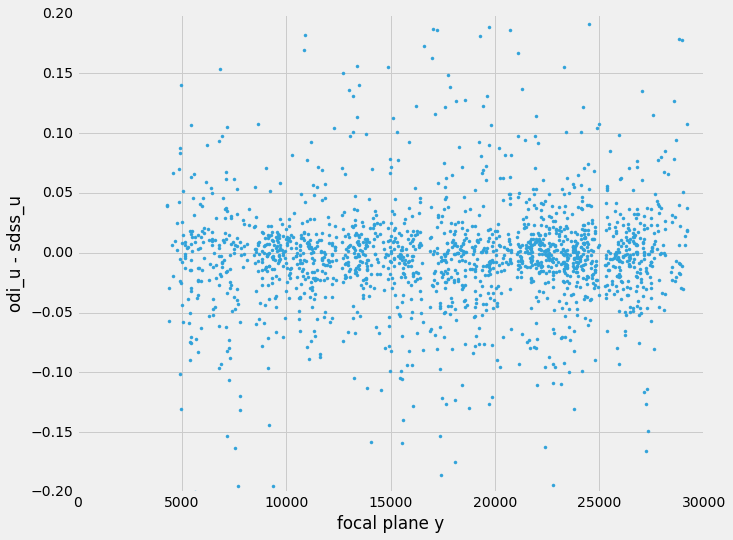

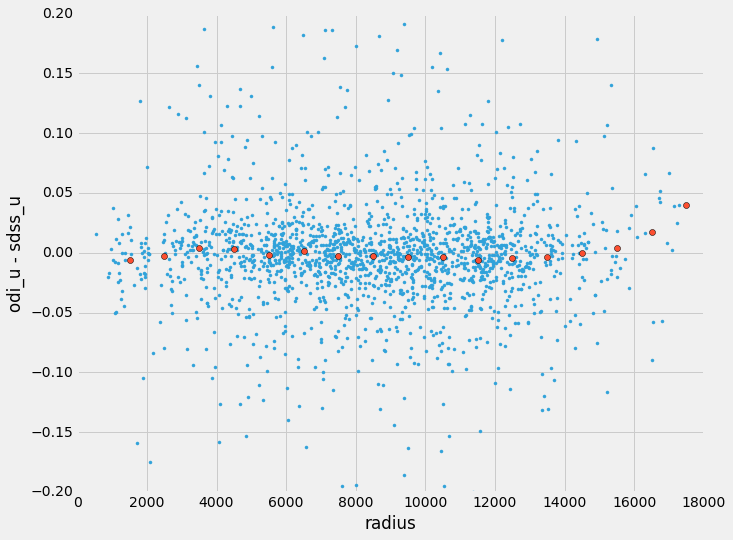

In [35]:
plt.plot (ra, magdelta, '.')
plt.ylim ([-0.2,0.2])
plt.xlabel ("focal plane x")
plt.ylabel ("odi_u - sdss_u")
plt.show()    
plt.clf()
plt.plot (dec, magdelta, '.')
plt.ylim([-0.2,0.2])
plt.xlabel ("focal plane y")
plt.ylabel ("odi_u - sdss_u")
plt.show()


r = np.asarray(np.sqrt ( (np.asarray(ra) - 16800) **2 + (np.asarray(dec) - 16800) **2 ))
plt.plot (r, magdelta, ".")
plt.ylim([-0.2,0.2])
plt.xlabel ("radius")
plt.ylabel ("odi_u - sdss_u")


n = 20
width = 20000 / n

_x = (np.asarray(range (0,n)) * width)
_y = []

for x in _x:
    b = np.median (magdelta[(r >= (x - width/2)) & (r <= (x + width / 2))] )
    _y.append (b)
_y = np.asarray (_y)    
plt.plot (_x + width / 2, _y, "o")
plt.show()